In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
%cd ..

/cis/home/dpacker/my_documents/equivariant-attention


In [19]:
from models import translation_attention
from models import positional_encodings
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

rng = jax.random.PRNGKey(seed=123)
rngs = jax.random.split(rng, 2)

In [53]:
d = 5
n = 80
attention_model = translation_attention.TranslationAttention(rngs[0], d, n)

fft_keys = attention_model.fft_keys
fft_values = attention_model.fft_values
beta = 1.

f = lambda x : (jnp.roll(x, 1, axis=-1))

In [64]:
N = 300
x = jax.random.normal(rngs[1], shape=[N, d])
x /= jnp.linalg.norm(x, axis=-1)[:, None]
y = f(x)
# x_enc = positional_encodings.positional_encoding(x, method="stereographic")

loss_hist = []
for _ in range(2000):
  loss_hist.append(translation_attention.loss([fft_keys, fft_values, beta], x, y).item())
  fft_keys, fft_values, beta = translation_attention.update([fft_keys, fft_values, beta], x, y, 0.0001)

In [66]:
# translation_attention._batched_call_fn(x, fft_keys, fft_values)
loss_hist[-1]

238.66616821289062

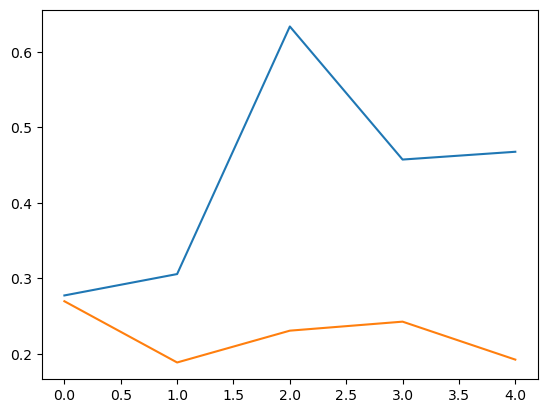

In [67]:
# plt.plot(x[0])
plt.plot(y[0])
plt.plot(translation_attention.call_fn(x[0], fft_keys, fft_values, beta))

In [66]:
output = jnp.zeros(d)
for i in range(d):
  output += weights[i] * jnp.roll(values, i, axis = -1)
  
  
fft_output = jnp.fft.ifft(jnp.fft.fft(weights) * jnp.fft.fft(values))

In [67]:
output

Array([[0.1488476 , 0.40460968, 0.1488476 , 0.1488476 , 0.1488476 ]],      dtype=float32)

In [68]:
fft_output

Array([[[0.14884758+0.j, 0.40460968+0.j, 0.14884758+0.j, 0.14884758+0.j,
         0.14884757+0.j]]], dtype=complex64)